In [6]:
import numpy as np
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)

In [37]:
x = np.array([1,2,3,4,5,6,7,8,9])
xx = x**2
print(xx)
print(shift_spectrum(x, xx, 3))

[ 1  4  9 16 25 36 49 64 81]
[64 81  1  4  9 16 25 36 49]


In [209]:
def gaussian_line(x, A, x0, std):
    return A * (np.exp(-(x-x0)**2 /std ))# / np.max(np.exp((x-x0)**2 /std ))

def create_spectrum(line_list):
    spectrum = np.zeros(line_list[0].shape)
    for line in line_list:
        spectrum += line
    return spectrum
    
def shift_spectrum(x, y, shift, n_shifts = 1, decay = 0.3):
    x = np.array(x)
    shifted_spectrum = y.copy()
    dx = np.where(x >= shift)[0][0]
    for n in range(1, n_shifts+1):
        y_new = np.roll(y, n * dx)
        shifted_spectrum += decay * y_new
    return shifted_spectrum

def get_measurements(t, spectrum, samples = 10):
    X = []
    for sample in range(samples):
        X.append(shift_spectrum(t, spectrum, 100, n_shifts = 4) + np.abs(np.random.normal(0, 0.2, 200)))
    X = np.array(X)
    return(X)

In [210]:
t = np.linspace(0, 500, 200)
y1 = gaussian_line(t, 10, 173, 10)
y2 = gaussian_line(t, 2, 147, 10)
y3 = gaussian_line(t, 7, 202, 7)
spectrum = create_spectrum([y1, y2, y3])

samples = get_measurements(t, spectrum, samples = 10)


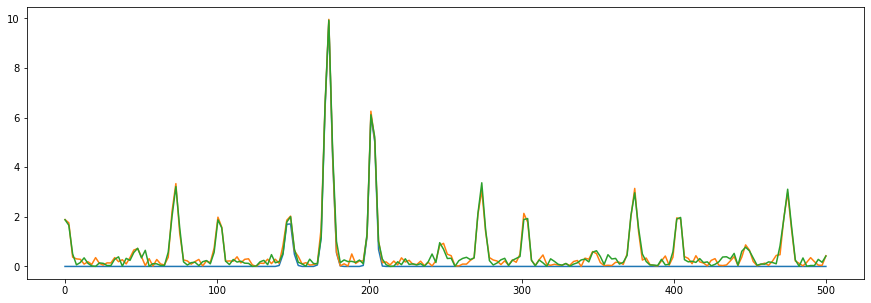

In [211]:
fig = plt.figure(figsize = (15,5))
plt.plot(t, spectrum)
plt.plot(t, samples[0,:])
plt.plot(t, samples[1,:])
plt.show()